In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
df=pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [6]:
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

# Data Visualization

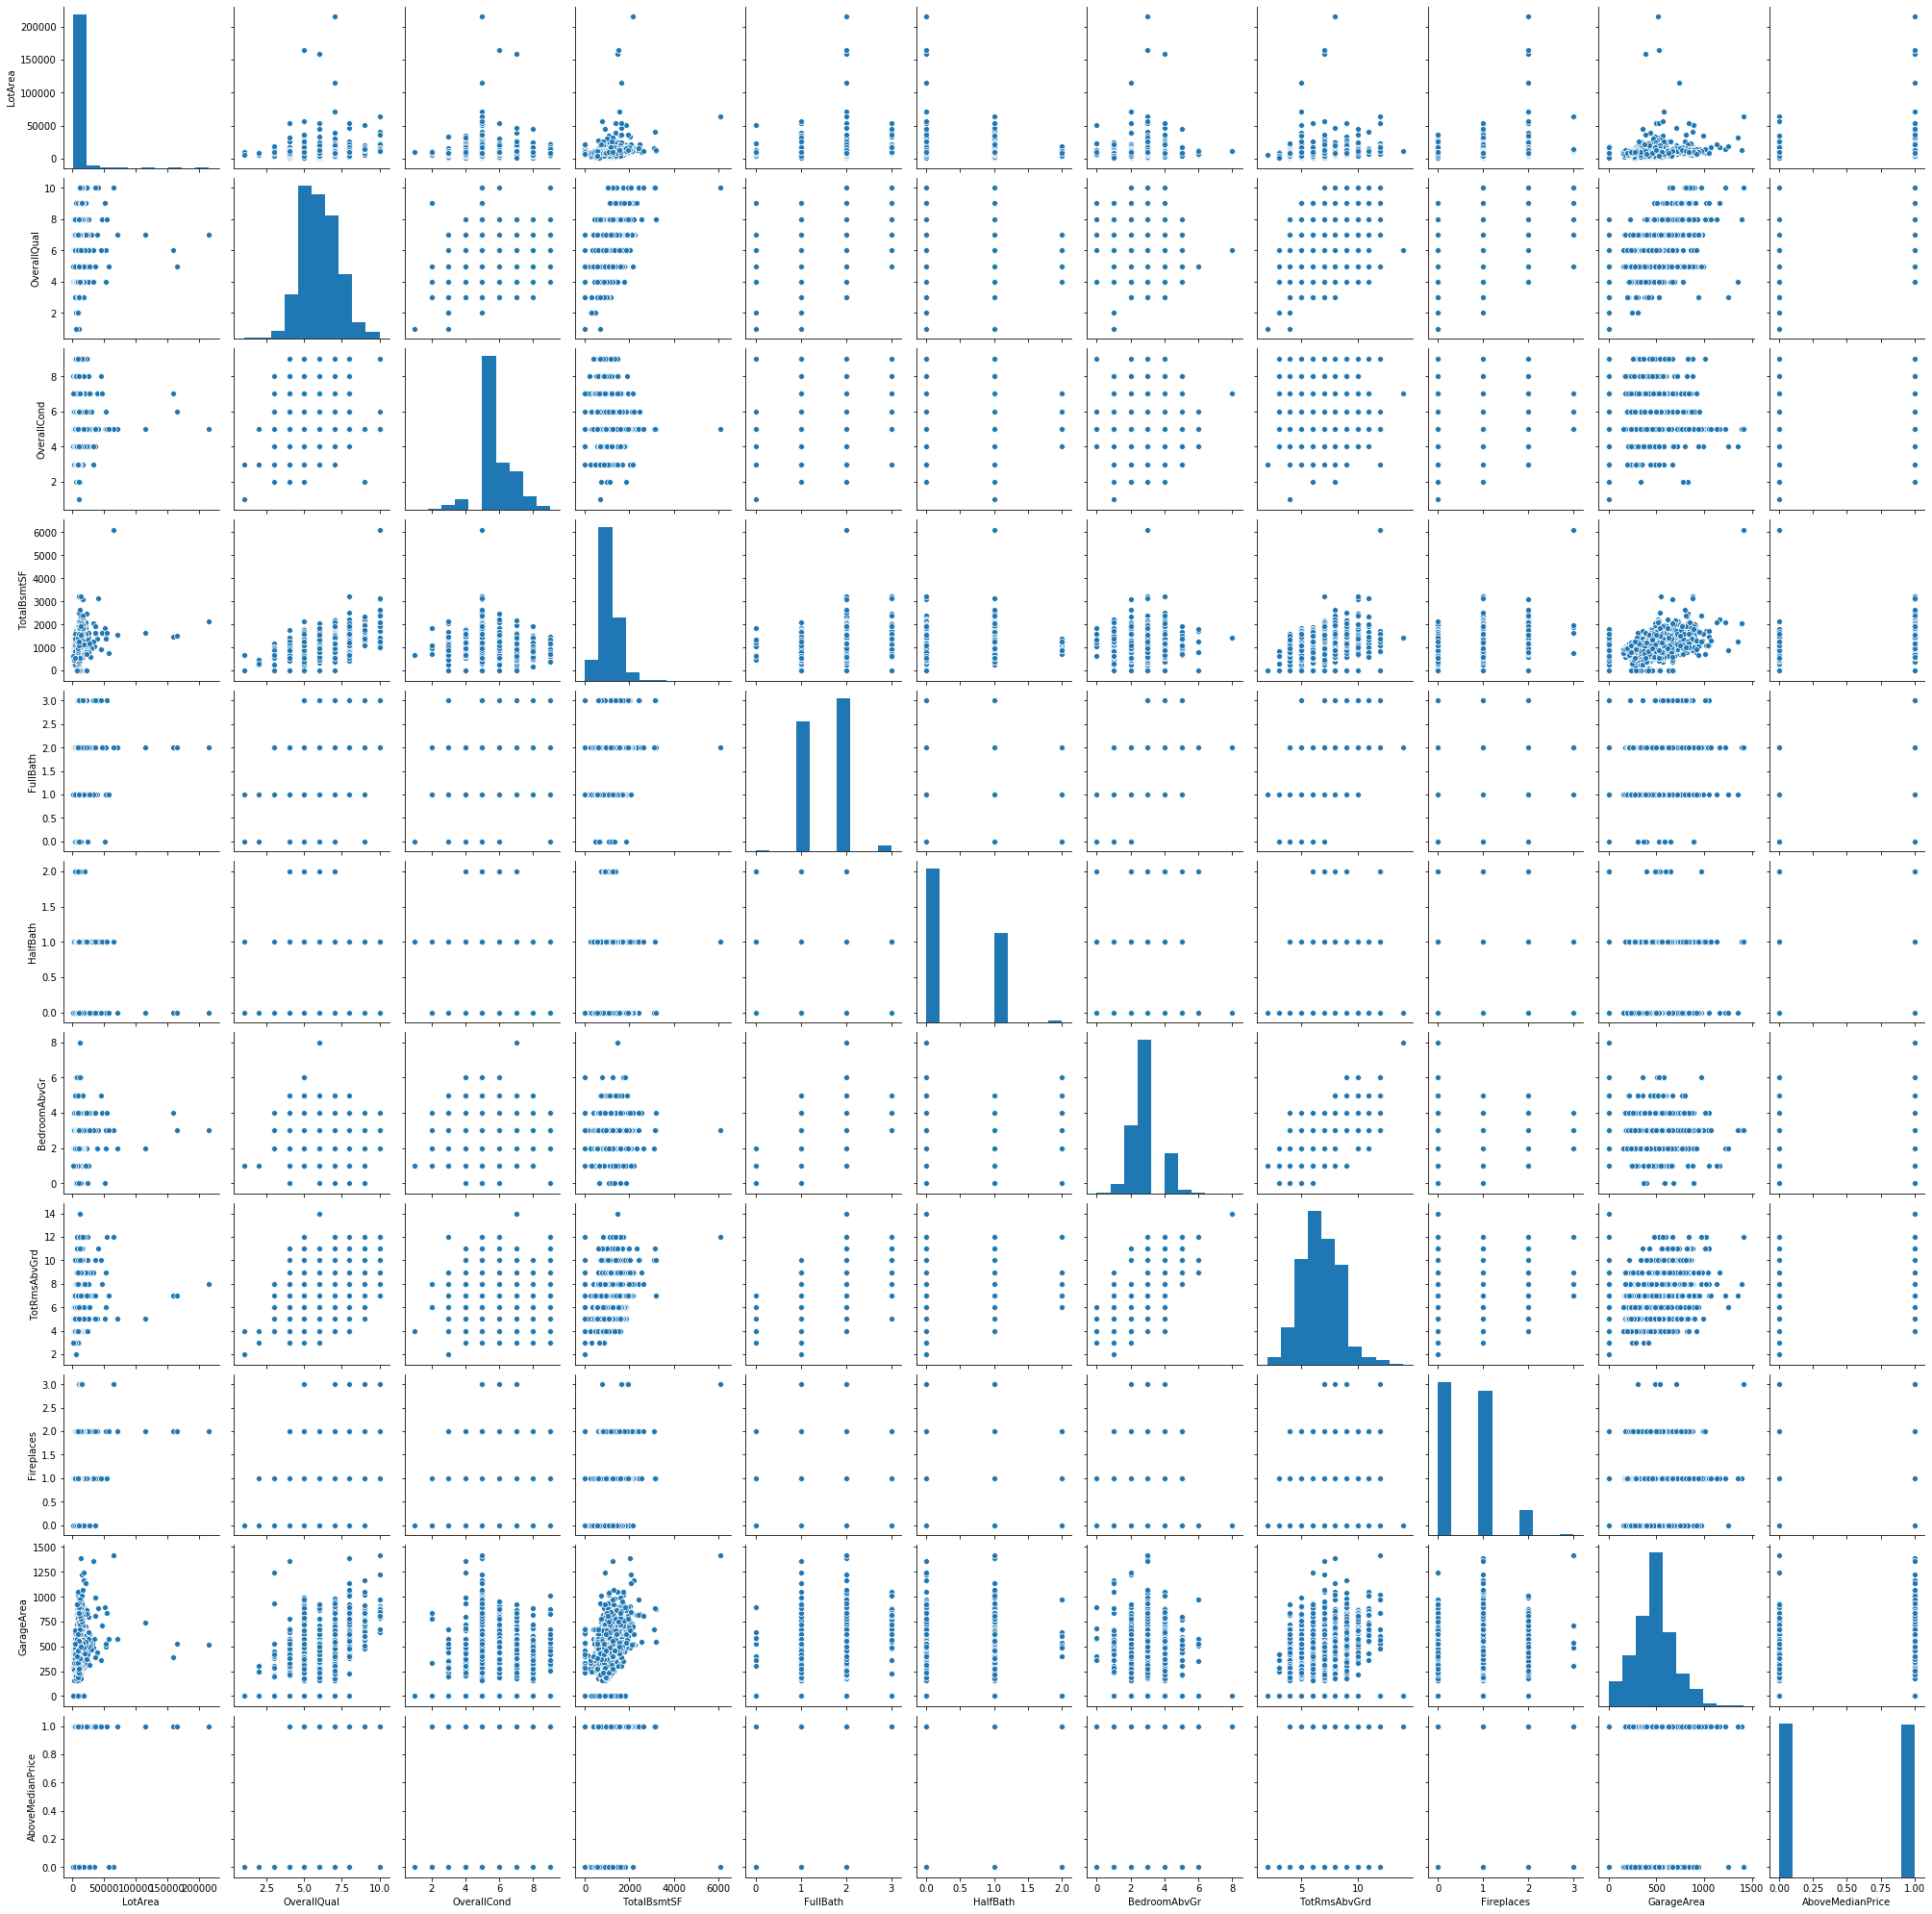

In [7]:
sns.pairplot(df)

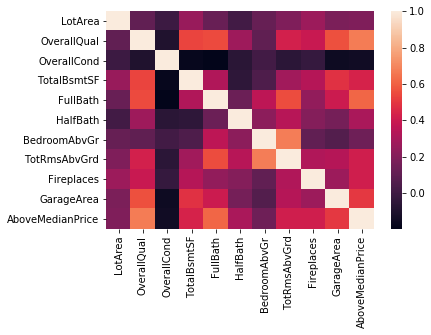

In [8]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'AboveMedianPrice')

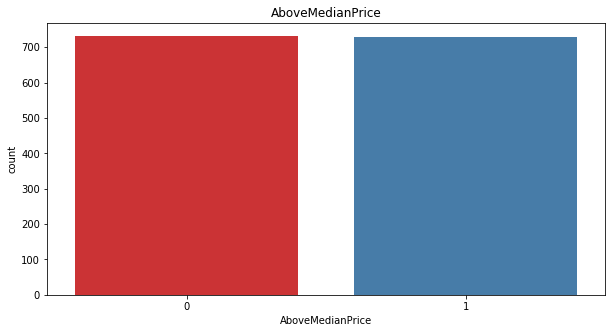

In [9]:
fig =plt.figure(figsize=(10,5))
sns.countplot(df['AboveMedianPrice'],palette='Set1')
plt.title('AboveMedianPrice')

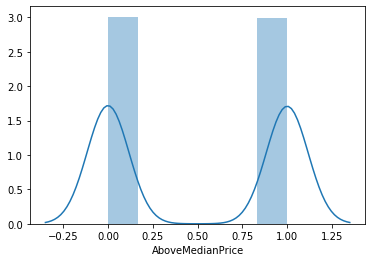

In [10]:
sns.distplot(df["AboveMedianPrice"])

Text(0.5, 1.0, 'AboveMedianPrice')

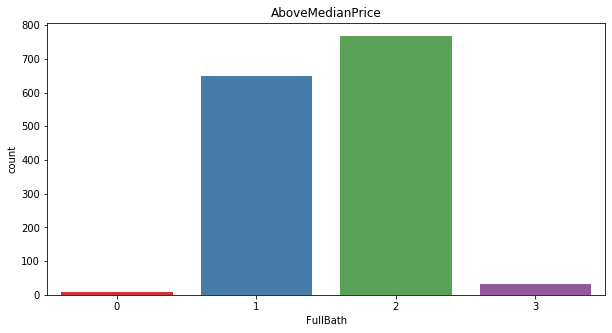

In [11]:
fig =plt.figure(figsize=(10,5))
sns.countplot(df['FullBath'],palette='Set1')
plt.title('AboveMedianPrice')

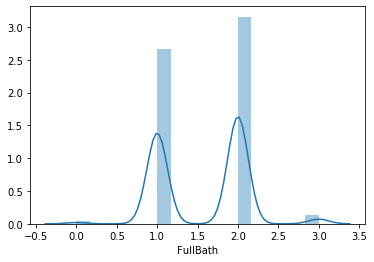

In [12]:
sns.distplot(df["FullBath"])

# Model Building

In [13]:
x=(df.drop('AboveMedianPrice',axis='columns')).values
x

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [14]:
y=df.AboveMedianPrice.values
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

splitting the data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Algorithm/ Model 1:Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.5734244824639638

In [19]:
lr_pred=lr.predict(x_test)

# Algorithm/ Model 2:XGBOOOST

In [20]:
import xgboost as xgb
xgbmodel=xgb.XGBClassifier(base_score=0.50, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
xgbmodel.score(x_test,y_test)

0.9178082191780822

In [22]:
xgb_pred=xgbmodel.predict(x_test)

# Algorithm/ Model 3:DeepLearning

In [23]:
#splitting the data into train,valid and test data
from sklearn.model_selection import train_test_split
x_train,x_val_and_test,y_train,y_val_and_test=train_test_split(x,y,test_size=0.3)
x_val,x_test,y_val,y_test=train_test_split(x_val_and_test,y_val_and_test,test_size=0.5)

In [24]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model=keras.Sequential([
    Dense(32,activation='relu', input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [27]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
el=EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [29]:
hist=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_val,y_val), callbacks=[el])

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 663us/step - loss: 0.7234 - accuracy: 0.5039 - val_loss: 0.7097 - val_accuracy: 0.5160
Epoch 2/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.7064 - accuracy: 0.5039 - val_loss: 0.6984 - val_accuracy: 0.5114
Epoch 3/100
1022/1022 [==============================] - 0s 82us/step - loss: 0.6953 - accuracy: 0.4980 - val_loss: 0.6904 - val_accuracy: 0.5068
Epoch 4/100
1022/1022 [==============================] - 0s 80us/step - loss: 0.6870 - accuracy: 0.5431 - val_loss: 0.6840 - val_accuracy: 0.6256
Epoch 5/100
1022/1022 [==============================] - 0s 89us/step - loss: 0.6799 - accuracy: 0.6820 - val_loss: 0.6783 - val_accuracy: 0.7123
Epoch 6/100
1022/1022 [==============================] - 0s 81us/step - loss: 0.6732 - accuracy: 0.7661 - val_loss: 0.6726 - val_accuracy: 0.7352
Epoch 7/100
1022/1022 [==============================] - 0s 95us/step - loss

1022/1022 [==============================] - 0s 54us/step - loss: 0.3112 - accuracy: 0.8806 - val_loss: 0.3800 - val_accuracy: 0.8584
Epoch 57/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.3091 - accuracy: 0.8806 - val_loss: 0.3787 - val_accuracy: 0.8539
Epoch 58/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.3073 - accuracy: 0.8845 - val_loss: 0.3772 - val_accuracy: 0.8584
Epoch 59/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3057 - accuracy: 0.8836 - val_loss: 0.3762 - val_accuracy: 0.8584
Epoch 60/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8836 - val_loss: 0.3753 - val_accuracy: 0.8584
Epoch 61/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.3022 - accuracy: 0.8806 - val_loss: 0.3743 - val_accuracy: 0.8539
Epoch 62/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.3006 - accuracy: 0.8826 - val_loss: 0.3729 - val_a

In [30]:
model.evaluate(x_test,y_test)[1]

219/219 [==============================] - 0s 41us/step


0.853881299495697

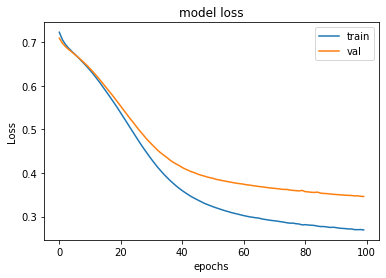

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('model loss')
plt.legend(['train','val'],loc='upper right')
plt.show()

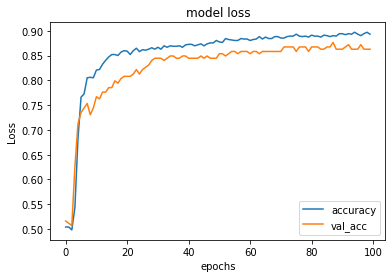

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('model loss')
plt.legend(['accuracy','val_acc'],loc='lower right')
plt.show()

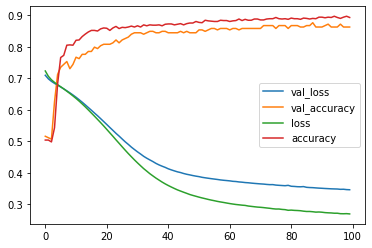

In [33]:
data=pd.DataFrame(model.history.history)
data.plot()

In [34]:
lr=model.predict(x_test)

In [44]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,lr))

0.07389856788948335
